# Tercera entrega proyecto Mineria de datos

>Juan Castillo

>Daniela Herrera

# Resumen general

Resumen de preprosesamiento

- No hay valores faltantes

- Variables categoricas inconsistentes: la edad, FCVC, NCP, CH2O, FAF	y TUE. Para usar la edad en el modelo se trunco a 0 decimales

- Duplicados: Si bien no hay un ID o variable indicadora, hay individuos con la misma informacion, eliminando 24 registros 

- Dos variables, fue necesario unir subcategorias en una sola, al tener muy poca informacion

- La altura no se empleo en el analisis al ser el indice de masa corporal una operacion entre estas dos, y ademas empleando una prueba chi cuadrado es 

- Se ejecutaron dos modelos: Un modelo lasso y un arbol de desicion

- El modelo ensamblado mejoro las metricas

- El mejor modelo individual fue el arbol de decision

## METRICAS

In [ ]:
primera = [0.9297 ,0.9350, 0.9425] # ROC
segunda = [0.9314 , 0.9346,0.9332] # Accuracy
tercera = [0.9525, 0.9581 , 0.9636] # Fbeta = 2
cuarta = [0.9314, 0.9346, 0.9425] # Exactitud
quinta = [0.9568, 0.9644, 0.9695] #Recall

In [ ]:
tablita= pd.DataFrame(list(zip(primera,segunda,tercera,cuarta, quinta)) ,columns = ['ROC-AUC','Accuracy','F2','Exactitud','Recall'], index = ['Lasso','Arbol','Ensamblado'])
tablita

,ROC-AUC,Accuracy,F2,Exactitud,Recall
Lasso,0.9297,0.9314,0.9525,0.9314,0.9568
Arbol,0.9350,0.9346,0.9581,0.9346,0.9644
Ensamblado,0.9425,0.9332,0.9636,0.9425,0.9695


# Librerias y carga de la base

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.metrics as metrics

In [ ]:
url = 'https://raw.githubusercontent.com/DavidCastillo13/MineriaDatos_2022_2/main/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(url)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Preprosesamiento y duplicados

In [ ]:
data_m = data.copy() # Creando una copia de base original

In [ ]:
data_m.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data_m.isnull().sum() # No hay valores faltantes para la base 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data_m['Gender'].value_counts() # No hay inconsistencias para el genero

Male      1068
Female    1043
Name: Gender, dtype: int64

In [ ]:
data_m['Age'].value_counts() # Hay valores decimales para la edad, se decidio truncar estos valores

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

In [ ]:
data_m['Age']=data_m['Age'].round(0)

In [ ]:
data_m['Age'].value_counts() 

21.0    236
23.0    218
26.0    213
18.0    212
19.0    169
22.0    163
20.0    150
24.0     95
25.0     82
17.0     69
31.0     62
30.0     53
27.0     43
33.0     37
38.0     34
29.0     33
34.0     29
32.0     26
39.0     25
37.0     24
41.0     20
28.0     20
16.0     20
35.0     19
40.0     19
44.0      6
36.0      6
42.0      6
55.0      5
45.0      3
43.0      3
46.0      2
51.0      2
48.0      1
61.0      1
14.0      1
56.0      1
15.0      1
52.0      1
47.0      1
Name: Age, dtype: int64

In [ ]:
data_m['Height'].describe() # Para la altura si bien hay una o varias personas con alturas de 1.98 cm, 

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

In [ ]:
data_m[data_m['Height'] > 1.90] # Si bien hay individuos con grandes alturas, no hay evidencia para pensar en inconsistencias

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
16,Male,27.0,1.930000,102.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
165,Male,30.0,1.920000,130.000000,yes,no,2.000000,3.000000,Sometimes,yes,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
178,Male,26.0,1.910000,84.000000,yes,yes,3.000000,3.000000,Frequently,yes,2.000000,no,2.000000,2.000000,Frequently,Public_Transportation,Normal_Weight
349,Male,20.0,1.980000,125.000000,yes,yes,2.000000,3.000000,Always,no,3.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
464,Male,18.0,1.930000,86.000000,no,no,3.000000,4.000000,Always,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Normal_Weight
981,Male,33.0,1.913241,101.482054,yes,yes,2.000000,2.110937,Sometimes,no,2.175632,no,1.000000,0.000000,Sometimes,Walking,Overweight_Level_II
1066,Male,31.0,1.919543,101.544589,yes,yes,2.000000,1.005391,Sometimes,no,2.001936,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
1126,Male,33.0,1.903832,99.812443,yes,yes,2.000000,1.863012,Sometimes,no,2.196471,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
1261,Male,21.0,1.930416,118.560509,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.732186,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
1262,Male,22.0,1.947406,116.893105,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.975187,1.000000,Sometimes,Public_Transportation,Obesity_Type_I


In [ ]:
data_m['Weight'].describe() # No hay evidencia para afirmar que el rango de la variable peso sea inconsistente

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

In [ ]:
data_m[(data_m['Weight'] >= 150) & (data_m['Weight'] <= 180)][['Gender','Age','Height','Weight']] # Revisando algunos valores extremos, no hay indicios para sospechar de inconcistencias

,Gender,Age,Height,Weight
344,Male,18.0,1.870000,173.000000
502,Female,22.0,1.843419,165.057269
1814,Female,21.0,1.730113,152.094362
1826,Female,18.0,1.827730,152.720545
1838,Female,21.0,1.807340,155.872093
1854,Female,20.0,1.787195,151.975864
1897,Female,20.0,1.782714,154.618446
1898,Female,19.0,1.793824,160.935351
1909,Female,22.0,1.809871,152.394739
1910,Female,22.0,1.803677,160.639405


In [ ]:
data_m['family_history_with_overweight'].value_counts() # No hay inconsistencias para el historial de familia con sobrepeso

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [ ]:
data_m['FAVC'].value_counts() # Sin inconsistencias

yes    1866
no      245
Name: FAVC, dtype: int64

In [ ]:
data_m['FCVC'].value_counts() # Hay inconsistencias en esta variable

3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64

In [ ]:
data_m['NCP'].value_counts() # Variable inconsistente

3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64

In [ ]:
data_m['CAEC'].value_counts() # Sin inconsistencias

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [ ]:
data_m['SMOKE'].value_counts() # Sin inconcistencias

no     2067
yes      44
Name: SMOKE, dtype: int64

In [ ]:
data_m['CH2O'].value_counts() # Hay inconsistencias

2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: CH2O, Length: 1268, dtype: int64

In [ ]:
data_m['SCC'].value_counts() # Sin inconsistencias

no     2015
yes      96
Name: SCC, dtype: int64

In [ ]:
data_m['FAF'].value_counts() # Inconsistente

0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: FAF, Length: 1190, dtype: int64

In [ ]:
data_m['TUE'].value_counts() # Inconsistente

0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: TUE, Length: 1129, dtype: int64

In [ ]:
data_m['CALC'].value_counts() # Sin inconsistencias

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
data_m['MTRANS'].value_counts() # Sin insonsistencias

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
data_m['NObeyesdad'].value_counts() # Sin inconsistencias

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

Duplicados

In [ ]:
data_m[data_m.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
base = data_m.drop_duplicates().copy()

In [ ]:
print(data_m.shape)
print(base.shape) # Eliminando duplicados

(2111, 17)
(2087, 17)


# Seleccion de variables (a priori)

In [ ]:
base.reset_index()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.0,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.0,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,Male,22.0,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2106,Female,21.0,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,2107,Female,22.0,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,2108,Female,23.0,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,2109,Female,24.0,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
base.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
base['NObeyesdad'] = base.NObeyesdad.map({"Overweight_Level_I":0, "Normal_Weight":0,"Insufficient_Weight":0 ,"Overweight_Level_II":1, "Obesity_Type_I":1, "Obesity_Type_III":1, "Obesity_Type_II":1}) # variable respuesta

In [ ]:
base['NObeyesdad'].value_counts()

1    1262
0     825
Name: NObeyesdad, dtype: int64

In [ ]:
base['CAEC'].value_counts() #Comes algún alimento entre comidas

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

In [ ]:
DCAEC = pd.get_dummies(base["CAEC"], prefix='CAEC')
DCAEC.head()

,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
base['MTRANS'].value_counts()

Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
mask = base['MTRANS'].str.startswith('B')
mask1 = base['MTRANS'].str.startswith('W')

In [ ]:
base.loc[mask, 'MTRANS'] = 'Walking_and_bike'
base.loc[mask1, 'MTRANS'] = 'Walking_and_bike'

In [ ]:
base['MTRANS'].value_counts()

Public_Transportation    1558
Automobile                456
Walking_and_bike           62
Motorbike                  11
Name: MTRANS, dtype: int64

In [ ]:
DMTRANS = pd.get_dummies(base["MTRANS"], prefix='MTRANS')
DMTRANS.head()

,MTRANS_Automobile,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking_and_bike
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [ ]:
base['CALC'].value_counts() #con qué frecuencia bebes alcohol

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
mask2 = base['CALC'].str.startswith('A')

In [ ]:
base.loc[mask2,'CALC'] = 'Frequently'

In [ ]:
base['CALC'].value_counts() 

Sometimes     1380
no             636
Frequently      71
Name: CALC, dtype: int64

In [ ]:
base['family_history_with_overweight'] = base.family_history_with_overweight.map({"no":0,"yes":1}) # Explicativas categoricas
base['SMOKE']= base.SMOKE.map({"no":0,"yes":1})
base['FAVC'] = base.FAVC.map({"no":0,"yes":1})
base['Gender'] = base.Gender.map({"Female":0,"Male":1})

In [ ]:
DCALC=pd.get_dummies(base['CALC'] , prefix = 'CALC') 
DCALC

,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
2106,0,1,0
2107,0,1,0
2108,0,1,0
2109,0,1,0


In [ ]:
X = base[['family_history_with_overweight',	'FAVC',	'FCVC','NCP'	,'SMOKE'	,'CH2O'	,'FAF'	,'TUE']]
X

,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,FAF,TUE
0,1,0,2.0,3.0,0,2.000000,0.000000,1.000000
1,1,0,3.0,3.0,1,3.000000,3.000000,0.000000
2,1,0,2.0,3.0,0,2.000000,2.000000,1.000000
3,0,0,3.0,3.0,0,2.000000,2.000000,0.000000
4,0,0,2.0,1.0,0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,1,1,3.0,3.0,0,1.728139,1.676269,0.906247
2107,1,1,3.0,3.0,0,2.005130,1.341390,0.599270
2108,1,1,3.0,3.0,0,2.054193,1.414209,0.646288
2109,1,1,3.0,3.0,0,2.852339,1.139107,0.586035


In [ ]:
X_cat = X.astype(int)
X_cat

,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,FAF,TUE
0,1,0,2,3,0,2,0,1
1,1,0,3,3,1,3,3,0
2,1,0,2,3,0,2,2,1
3,0,0,3,3,0,2,2,0
4,0,0,2,1,0,2,0,0
...,...,...,...,...,...,...,...,...
2106,1,1,3,3,0,1,1,0
2107,1,1,3,3,0,2,1,0
2108,1,1,3,3,0,2,1,0
2109,1,1,3,3,0,2,1,0


In [ ]:
y = base['NObeyesdad']

Empleando prueba chi cuadrado y F para las variables cualitativas y cuantitativas respectivamente

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##### Solo para las categoricas, no meter algo continuo

#Convierte las características categóricas a enteros
X_cat = X.astype(int)

#Tres características con los chi cuadrados más altos son seleccionados
chi2_features = SelectKBest(chi2,k=3) # Empezar a variar el k con todas las variables (no se si se pueda), 1 variable menos, 2, 3...
X_kbest_features = chi2_features.fit_transform(X_cat, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = chi2_features.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])

Variables seleccionadas:
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
dtype: object

Número original de variables:  8
Número de variables seleccionadas:  3


In [ ]:
X = base[['Weight','Height','Age']]

In [ ]:
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest_features = fvalue_selector.fit_transform(X, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = fvalue_selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])


Variables seleccionadas:
Weight    float64
Age       float64
dtype: object

Número original de variables:  3
Número de variables seleccionadas:  2


In [ ]:
X=base[['Weight','Age']] # Como las dos variables por una prueba chi cuadrado, que mas explican a la obesidad es el peso y la edad, se usa estas dos 

In [ ]:
from numpy.lib.function_base import median
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = np.hstack([X,base[['family_history_with_overweight',	'FAVC'	,'SMOKE','Gender']].values]) # Como estandarizar una dummy no tendria sentido, estandarizamos las otras 3 variables y añadimos la dummy
X = np.hstack([X,DCAEC[['CAEC_Always',	'CAEC_Frequently',	'CAEC_Sometimes',	'CAEC_no']].values])
X = np.hstack([X,DMTRANS[['MTRANS_Automobile'	,'MTRANS_Motorbike'	,'MTRANS_Public_Transportation'	,'MTRANS_Walking_and_bike']].values])
X = np.hstack([X,DCALC[['CALC_Frequently',	'CALC_Sometimes',	'CALC_no']].values])
X = np.hstack([X,base[['CH2O'	,'FAF',	'TUE']].values])  # Las ultimas 3 son las categoricas que tienen decimales
X

array([[-0.87298467, -0.52622399,  1.        , ...,  2.        ,
         0.        ,  1.        ],
       [-1.1785081 , -0.52622399,  1.        , ...,  3.        ,
         3.        ,  0.        ],
       [-0.37650911, -0.21266811,  1.        , ...,  2.        ,
         2.        ,  1.        ],
       ...,
       [ 1.78848152, -0.21266811,  1.        , ...,  2.054193  ,
         1.414209  ,  0.646288  ],
       [ 1.77539324, -0.05589017,  1.        , ...,  2.852339  ,
         1.139107  ,  0.586035  ],
       [ 1.78020524, -0.05589017,  1.        , ...,  2.863513  ,
         1.026452  ,  0.714137  ]])

In [ ]:
# separate train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1460, 20), (627, 20))

# Modelo lasso (Daniela)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
divi = [1/1.15,1,2,5,10,15,20,30,50,75,100,120,130,150,200,300,500,750,1000,10000]
alphas=[]
for i in divi:
  for h in range(0,9):
   qq = np.linspace(1,9,9, dtype=int)/i
   alphas.append(qq[h])
alphas = list(set(alphas)) 

In [ ]:
divi = [1/1.15,1,2,5,10,15,20,30,50,75,100,120,130,150,200,300,500,750,1000,10000]
alphas=[]
for i in divi:
  for h in range(0,9):
   qq = np.linspace(1,9,9, dtype=int)/i
   alphas.append(qq[h])
alphas = list(set(alphas))  # Valores unicos de los alphas creados, 115 diferentes valores
valida = np.linspace(2,10,9,dtype = int)
tolerancia = [0.0001,0.00001,0.000001]
solucionador = ['newton-cg', 'lbfgs', 'liblinear']
rocc =[]
reccall = []
colmm1 =[]
colmm2 =[]
colmm3 = []
colmm4 = []
for uwu in alphas:
  for h in valida:
    for r in tolerancia:
      for d in solucionador:
        lassoregcv = LogisticRegression(C = uwu , penalty='l2', random_state=1, tol = r, solver = d, max_iter=10000)
        colmm1.append(uwu)
        colmm2.append(r)
        colmm3.append(d)
        colmm4.append(h)
        validacion1 = cross_val_score(lassoregcv,X_train,y_train, cv = h, scoring = 'recall')
        validacion2 = cross_val_score(lassoregcv,X_train,y_train, cv = h, scoring = 'roc_auc')
        reccall.append(np.mean(validacion1))
        rocc.append(np.mean(validacion2))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search fail

In [ ]:
resumen1 = pd.DataFrame(list(zip(colmm1,colmm2,colmm3,colmm4, reccall,rocc)) ,columns = ['alphas','tol','solver','validacion','recall','roc'])
resumen1.head()

mejores1 = resumen1[(resumen1['recall']==max(resumen1['recall'])) | (resumen1['roc']==max(resumen1['roc']))]
mejores1
mejores1[mejores1['recall'] ==min(mejores1['recall'])] # El mismo alpha (1.61) pero distintas tolerancias (no tenemos en cuenta los otros modelos por que recall =1)
#, y da los mismos recall y roc, por lo que 0.0001 es la mejor, y el solver o newton-cg o lbfgs, con 8 validaciones

,alphas,tol,solver,validacion,recall,roc
8073,1.6,0.000100,newton-cg,8,0.958546,0.988462
8074,1.6,0.000100,lbfgs,8,0.958546,0.988462
8076,1.6,0.000010,newton-cg,8,0.958546,0.988462
8077,1.6,0.000010,lbfgs,8,0.958546,0.988462
8079,1.6,0.000001,newton-cg,8,0.958546,0.988462
8080,1.6,0.000001,lbfgs,8,0.958546,0.988462


Si bien varios modelos para el solver lineal no convergieron y para unos cuantos modelos es candidato por metricas, por convergencia no lo tenemos en cuenta.

# Arbol de desicion (Juan)

In [ ]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clasificador = ['gini']
profundidad = np.linspace(1,80,80,dtype = int)
min_personas = np.linspace(4,16,9,dtype = int)
particion = ['best', 'random']
val_n = np.linspace(2,10,9,dtype = int)
recalll=[]
roc_aucc=[]
modelos = []
for i in min_personas:
  for j in profundidad:
    for s in particion:
      for v in val_n:
        arbol = DecisionTreeClassifier( max_depth = j, min_samples_leaf = i, splitter=s, random_state=1)
        validacion1 = cross_val_score(arbol,X_train,y_train, cv = v, scoring = 'recall')
        validacion2 = cross_val_score(arbol,X_train,y_train, cv = v, scoring = 'roc_auc')
        recalll.append(np.mean(validacion1))
        roc_aucc.append(np.mean(validacion2))

In [ ]:
col_1=[];col_2=[];col_3=[];col_4=[]
for i in min_personas:
  for j in profundidad:
    for s in particion:
      for v in val_n:
        col_1.append(i)
        col_2.append(j)
        col_3.append(v)
        col_4.append(s)
resumen = pd.DataFrame(list(zip(col_1,col_2,col_3,col_4, recalll,roc_aucc)) ,columns = ['n_en_nodos','profundidad','validacion','divisor','recall','roc'])
resumen.head()

mejores = resumen[(resumen['recall']==max(resumen['recall'])) | (resumen['roc']==max(resumen['roc']))]
mejores# La menos profundidad fue de 5, con 10 validaciones cruzadas y 4 nodos, y ademas el divisor usado el mejor teniendo en cuenta Gini, para este ejercicio se toma este como el mejor
# pero, el modelo con el mejor roc es otro, habria que verificar

,n_en_nodos,profundidad,validacion,divisor,recall,roc
80,4,5,10,best,0.982692,0.980977
10192,14,7,6,best,0.949306,0.983404


El modelo escogido tiene 5 individuos por hoja, y 6 de profundidad

# Seleccion de variables

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(DecisionTreeClassifier(max_depth=5,min_samples_leaf=4, random_state=1 ), # Con solo 1 variable ya clasifica incluso bien XD, tal vez demasiado, y de ahi para arriba no es demasiado el incremento
           k_features=4, # Se escogen 4 variables , a priori al no observar mayor variacion en el roc_auc
           forward=True, 
           floating=False,  # Puedo escoger desde cuando inciaar, si una var, 2
           verbose=2,
           scoring='roc_auc',
           cv=5)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2022-11-24 21:42:52] Features: 1/4 -- score: 0.9653982926738263[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-11-24 21:42:53] Features: 2/4 -- score: 0.9743585123025336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2022-11-24 21:42:53] Features: 3/4 -- score: 0.9787080719457846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
a = ['Weight','Age']
a=np.hstack([a,base[['family_history_with_overweight',	'FAVC'	,'SMOKE','Gender']].columns])
a = np.hstack([a,DCAEC[['CAEC_Always',	'CAEC_Frequently',	'CAEC_Sometimes',	'CAEC_no']].columns])
a = np.hstack([a,DMTRANS[['MTRANS_Automobile'	,'MTRANS_Motorbike'	,'MTRANS_Public_Transportation'	,'MTRANS_Walking_and_bike']].columns])
a = np.hstack([a,DCALC[['CALC_Frequently',	'CALC_Sometimes',	'CALC_no']].columns])
a = np.hstack([a,base[['CH2O'	,'FAF',	'TUE']].columns]) # Las ultima

In [ ]:
print("Variables originales dataset:", a)
print("Variables seleccionadas :",a[list(sfs1.k_feature_idx_)])

Variables originales dataset: ['Weight' 'Age' 'family_history_with_overweight' 'FAVC' 'SMOKE' 'Gender'
 'CAEC_Always' 'CAEC_Frequently' 'CAEC_Sometimes' 'CAEC_no'
 'MTRANS_Automobile' 'MTRANS_Motorbike' 'MTRANS_Public_Transportation'
 'MTRANS_Walking_and_bike' 'CALC_Frequently' 'CALC_Sometimes' 'CALC_no'
 'CH2O' 'FAF' 'TUE']
Variables seleccionadas : ['Weight' 'FAVC' 'Gender' 'MTRANS_Automobile']


In [ ]:
treereg = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4, random_state=1)
treereg.fit(X_train[:,list(sfs1.k_feature_idx_)],y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=1)

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(treereg, out_file='tree_vehicles.PNG', feature_names=a[list(sfs1.k_feature_idx_)])

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_vehicles.dot -o tree_vehicles.png

# La variable mas importante es el año para empezar a dividir
# mse es la diferencia de los valores reales con las medias de cada grupo y ver la diferencia
# Izquierda menores o iguales a 2006, izquierda verdadero derecha falso
with open("tree_vehicles.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

FileNotFoundError: ignored

In [ ]:
sfs2 = SFS(LogisticRegression(C = 1.6 , penalty='l2', random_state=1, tol = 1e-4, solver = 'lbfgs', max_iter=6500), 
           k_features=6, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs2 = sfs2.fit(np.array(X_train), y_train)

In [ ]:
print("Variables originales dataset:", a)
print("Variables seleccionadas :",a[list(sfs2.k_feature_idx_)])

# Evaluacion de mejores modelos y ensamblaje

Primero se procede a ensablar el modelo asumiendo que a un modelo lasso se pueda realizar eliminacion hacia atras 

In [75]:
# predict method uses the best alpha value
lassoreg = LogisticRegression(C = 1.6 , penalty='l2', random_state=1, tol = 1e-4, solver = 'lbfgs', max_iter=6500)
lassoreg.fit(X_train,y_train)

LogisticRegression(C=1.6, max_iter=6500, random_state=1)

In [76]:
lassoreg.coef_

array([[ 6.75996377,  0.91818199,  1.83860316, -2.18141031,  0.40893376,
        -1.24759826, -0.75245812,  0.2572374 ,  1.0131929 , -0.51605432,
        -0.63828646,  1.19994331,  0.63915779, -1.1988968 , -0.27361916,
        -0.61366927,  0.88920628,  0.09727913, -0.47515544,  0.30186844]])

In [78]:
lassoreg.intercept_

array([2.07326575])

In [ ]:
mod1 = LogisticRegression(C = 1.6 , penalty='l2', random_state=1, tol = 1e-4, solver = 'lbfgs', max_iter=6500) # Modelo lasso con todas las variables
mod2 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4, random_state=1 ) # Arbol de desicion
mod3 = LogisticRegression(C = 1.6 , penalty='l2', random_state=1, tol = 1e-4, solver = 'lbfgs', max_iter=6500) # Modelo lasso con eliminacion hacia atras

In [ ]:
mod1.fit(X_train,y_train)
mod2.fit(X_train[:,list(sfs2.k_feature_idx_)],y_train)
mod3.fit(X_train[:,list(sfs1.k_feature_idx_)],y_train)

LogisticRegression(C=1.6, max_iter=6500, random_state=1)

In [ ]:
pred1 = mod1.predict(X_test)
pred2 = mod2.predict(X_test[:,list(sfs2.k_feature_idx_)])
pred3 = mod3.predict(X_test[:,list(sfs1.k_feature_idx_)])

In [ ]:
acc1 = metrics.accuracy_score(pred1,y_test)
acc2 = metrics.accuracy_score(pred2,y_test)
acc3 = metrics.accuracy_score(pred3,y_test)
print(acc1,acc2,acc3)

0.9314194577352473 0.9346092503987241 0.8963317384370016


In [ ]:
rco1=metrics.roc_auc_score(pred1,y_test)
rco2=metrics.roc_auc_score(pred2,y_test)
rco3=metrics.roc_auc_score(pred3,y_test)
print(rco1,rco2,rco3)

0.9297955069124425 0.935012285012285 0.8963059786315073


Probabilidades de exito (1) para personas con sobre peso, en el arbol de decision y lasso con variable completa

In [ ]:
prop1 = mod1.predict_proba(X_test)[:,1]
prop2 = mod2.predict_proba(X_test[:,list(sfs2.k_feature_idx_)])[:,1]

In [ ]:
mod1.classes_

array([0, 1])

Se emplearon los 3 modelos para ensamblar por la moda en una primera prueba, y los dos modelos lasso con variables completas y arbol de desicion empleando la prediccion de probabilidades

In [ ]:
import statistics as stat
modaaa=[]
mediaa=[]
propuesta=[]
for i in range(0,len(y_test)):
  modaaa.append(stat.mode([pred1[i],pred2[i],pred3[i]]))
  mediaa.append(np.mean([prop1[i],prop2[i]]))
  if mediaa[i] <0.5:
    propuesta.append(0)
  else:
    propuesta.append(1)

In [ ]:
metrics.accuracy_score(y_test,modaaa) # Por la moda

0.9298245614035088

In [ ]:
metrics.roc_auc_score(y_test,modaaa) # Por la moda

0.9161020457070652

In [ ]:
metrics.accuracy_score(y_test,propuesta) # En base a las probabilidades

0.9425837320574163

In [ ]:
metrics.roc_auc_score(y_test,propuesta) # En base a las probabilidades

0.9332694276813142

Se procede a analizar en mejor medida el modelo lasso y arbol de decision, y en conjunto ensamblados en base a las probabilidades

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, mod1.predict(X_test)) # lasso
cf_matrix

array([[207,  26],
       [ 17, 377]])

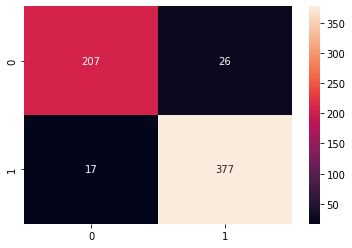

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='.0f')

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, mod2.predict(X_test[:,list(sfs2.k_feature_idx_)]))  
cf_matrix

array([[206,  27],
       [ 14, 380]])

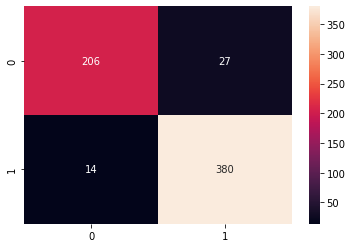

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='.0f') # Arbol de desicion

In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test,  mod1.predict(X_test), beta=2)) # Lasso

Fbeta score: 0.9525012632642749


In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test,  mod2.predict(X_test[:,list(sfs2.k_feature_idx_)]), beta=2)) # Arbol

Fbeta score: 0.9581442259203227


In [ ]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, mod1.predict(X_test))) # Lasso

Exactitud: 0.9314194577352473


In [ ]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, mod2.predict(X_test[:,list(sfs2.k_feature_idx_)]))) # Arbol

Exactitud: 0.9346092503987241


In [ ]:
print('Recall:', metrics.recall_score(y_test, mod1.predict(X_test)))

Recall: 0.9568527918781726


In [ ]:
print('Recall:', metrics.recall_score(y_test,mod2.predict(X_test[:,list(sfs2.k_feature_idx_)])))

Recall: 0.9644670050761421


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


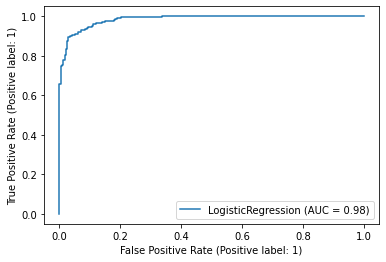

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(mod1, X_test, y_test) # Curva roc para el modelo 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


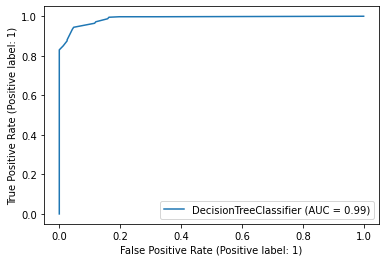

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(mod2, X_test[:,list(sfs2.k_feature_idx_)], y_test) # Curva roc para el modelo 2

Ahora para el modelo ensamblado

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,propuesta) # lasso
cf_matrix

array([[209,  24],
       [ 12, 382]])

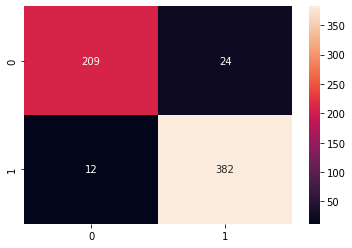

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='.0f')

In [ ]:
print('Fbeta score:', metrics.fbeta_score(y_test,  propuesta, beta=2)) # Lasso

Fbeta score: 0.9636730575176591


In [ ]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test,propuesta)) # Las

Exactitud: 0.9425837320574163


In [ ]:
print('Recall:', metrics.recall_score(y_test, propuesta))

Recall: 0.9695431472081218


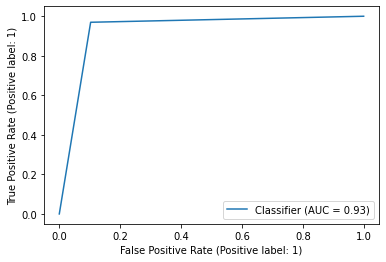

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,propuesta)

Si mejoro el modelo ensamblado las metricas en comparacion a los modelos individuales

El mejor modelo individual fue el arbol de desicion

# Que mejoraria del modelo

- La seleccion de variables del Lasso

- Mas evaluacion de metricas

- Menos profundo el arbol e intentar calibrar mas hiperparametros

- La seleccion de variables en general, fue arbitrario la desicion